In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib
from scipy import signal

In [2]:
#126.98 um = 1024 pixels
#16123.9204 um2 = 1048576 pixels2
micron_conv = 0.01537697 

In [3]:
MS_03142024 = pd.read_csv("/Users/brandonniese/Documents/03142024_dsr_rad_exp_master_sheet.csv")

In [9]:
MS_03142024


,Unnamed: 0,Nuclei_File,Membrane_File,Pixel_Coordinate,Nuclear_Area (pixels),Cell_Area (pixels),N:C_Ratio,circ.,Eccentricity,Bio rep,TechRep,strain
0,0,03142024_dsr27_0k_2h_A_1__nuclei_mask.tif,03142024_dsr27_0k_2h_A_1__cell_mask.tif,6,65,269,0.241636,0.962467,0.680695,03142024_dsr27_0k_2h_A,03142024_dsr27_0k_2h_A_1,03142024_dsr27_0k_2h
1,1,03142024_dsr27_0k_2h_A_1__nuclei_mask.tif,03142024_dsr27_0k_2h_A_1__cell_mask.tif,7,61,187,0.326203,0.976263,0.500671,03142024_dsr27_0k_2h_A,03142024_dsr27_0k_2h_A_1,03142024_dsr27_0k_2h
2,2,03142024_dsr27_0k_2h_A_1__nuclei_mask.tif,03142024_dsr27_0k_2h_A_1__cell_mask.tif,8,2,167,0.011976,1.087351,1.000000,03142024_dsr27_0k_2h_A,03142024_dsr27_0k_2h_A_1,03142024_dsr27_0k_2h
3,3,03142024_dsr27_0k_2h_A_1__nuclei_mask.tif,03142024_dsr27_0k_2h_A_1__cell_mask.tif,10,95,160,0.593750,0.460615,0.999967,03142024_dsr27_0k_2h_A,03142024_dsr27_0k_2h_A_1,03142024_dsr27_0k_2h
4,4,03142024_dsr27_0k_2h_A_1__nuclei_mask.tif,03142024_dsr27_0k_2h_A_1__cell_mask.tif,11,52,164,0.317073,0.895986,0.768959,03142024_dsr27_0k_2h_A,03142024_dsr27_0k_2h_A_1,03142024_dsr27_0k_2h
...,...,...,...,...,...,...,...,...,...,...,...,...
45648,45648,03142024_r1_10k_2h_C_3__nuclei_mask.tif,03142024_r1_10k_2h_C_3__cell_mask.tif,247,58,238,0.243697,0.928250,0.369540,03142024_r1_10k_2h_C,03142024_r1_10k_2h_C_3,03142024_r1_10k_2h
45649,45649,03142024_r1_10k_2h_C_3__nuclei_mask.tif,03142024_r1_10k_2h_C_3__cell_mask.tif,250,87,333,0.261261,0.918795,0.643431,03142024_r1_10k_2h_C,03142024_r1_10k_2h_C_3,03142024_r1_10k_2h
45650,45650,03142024_r1_10k_2h_C_3__nuclei_mask.tif,03142024_r1_10k_2h_C_3__cell_mask.tif,257,56,273,0.205128,0.988582,0.646803,03142024_r1_10k_2h_C,03142024_r1_10k_2h_C_3,03142024_r1_10k_2h
45651,45651,03142024_r1_10k_2h_C_3__nuclei_mask.tif,03142024_r1_10k_2h_C_3__cell_mask.tif,258,15,215,0.069767,0.923298,0.736117,03142024_r1_10k_2h_C,03142024_r1_10k_2h_C_3,03142024_r1_10k_2h


In [8]:
MS_03142024["Bio rep"] = MS_03142024.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
MS_03142024["TechRep"] = MS_03142024.apply(lambda x: x["Nuclei_File"][:-17], axis = 1)
MS_03142024["strain"] = MS_03142024.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)

In [40]:
CA_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_03142024_dsr5_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr5_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr5_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_03142024_dsr5_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr5_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr5_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_03142024_dsr30_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr30_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr30_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_03142024_dsr30_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr30_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_dsr30_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()


In [46]:
NA_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_dsr5_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr5_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr5_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_dsr5_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr5_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr5_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_dsr30_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr30_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr30_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_dsr30_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr30_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_dsr30_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

In [50]:
NFA_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["N:C_Ratio"].mean()

NFA_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["N:C_Ratio"].mean()

NFA_03142024_dsr5_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr5_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr5_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_C"]["N:C_Ratio"].mean()

NFA_03142024_dsr5_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr5_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr5_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_C"]["N:C_Ratio"].mean()

NFA_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["N:C_Ratio"].mean()

NFA_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["N:C_Ratio"].mean()

NFA_03142024_dsr30_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr30_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr30_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_C"]["N:C_Ratio"].mean()

NFA_03142024_dsr30_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_dsr30_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_dsr30_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_C"]["N:C_Ratio"].mean()

NFA_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["N:C_Ratio"].mean()

NFA_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["N:C_Ratio"].mean()
NFA_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["N:C_Ratio"].mean()
NFA_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["N:C_Ratio"].mean()

In [42]:
circ_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["circ."].mean()
circ_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["circ."].mean()
circ_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["circ."].mean()

circ_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["circ."].mean()
circ_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["circ."].mean()
circ_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["circ."].mean()

circ_03142024_dsr5_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_A"]["circ."].mean()
circ_03142024_dsr5_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_B"]["circ."].mean()
circ_03142024_dsr5_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_C"]["circ."].mean()

circ_03142024_dsr5_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_A"]["circ."].mean()
circ_03142024_dsr5_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_B"]["circ."].mean()
circ_03142024_dsr5_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_C"]["circ."].mean()

circ_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["circ."].mean()
circ_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["circ."].mean()
circ_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["circ."].mean()

circ_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["circ."].mean()
circ_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["circ."].mean()
circ_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["circ."].mean()

circ_03142024_dsr30_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_A"]["circ."].mean()
circ_03142024_dsr30_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_B"]["circ."].mean()
circ_03142024_dsr30_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_C"]["circ."].mean()

circ_03142024_dsr30_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_A"]["circ."].mean()
circ_03142024_dsr30_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_B"]["circ."].mean()
circ_03142024_dsr30_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_C"]["circ."].mean()

circ_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["circ."].mean()
circ_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["circ."].mean()
circ_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["circ."].mean()

circ_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["circ."].mean()
circ_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["circ."].mean()
circ_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["circ."].mean()

In [43]:
eccen_03142024_dsr2_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr2_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr2_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_0k_2h_C"]["Eccentricity"].mean()

eccen_03142024_dsr2_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr2_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr2_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr2_10k_2h_C"]["Eccentricity"].mean()

eccen_03142024_dsr5_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr5_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr5_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_0k_2h_C"]["Eccentricity"].mean()

eccen_03142024_dsr5_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr5_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr5_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr5_10k_2h_C"]["Eccentricity"].mean()

eccen_03142024_dsr27_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr27_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr27_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_0k_2h_C"]["Eccentricity"].mean()

eccen_03142024_dsr27_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr27_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr27_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr27_10k_2h_C"]["Eccentricity"].mean()

eccen_03142024_dsr30_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr30_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr30_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_0k_2h_C"]["Eccentricity"].mean()

eccen_03142024_dsr30_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_A"]["Eccentricity"].mean()
eccen_03142024_dsr30_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_B"]["Eccentricity"].mean()
eccen_03142024_dsr30_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_dsr30_10k_2h_C"]["Eccentricity"].mean()

eccen_03142024_r1_0k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_A"]["Eccentricity"].mean()
eccen_03142024_r1_0k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_B"]["Eccentricity"].mean()
eccen_03142024_r1_0k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_0k_2h_C"]["Eccentricity"].mean()

eccen_03142024_r1_10k_A = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_A"]["Eccentricity"].mean()
eccen_03142024_r1_10k_B = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_B"]["Eccentricity"].mean()
eccen_03142024_r1_10k_C = MS_03142024[MS_03142024["Bio rep"] == "03142024_r1_10k_2h_C"]["Eccentricity"].mean()

In [17]:
CA_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

NA_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NFA_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["N:C_Ratio"].mean()
NFA_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["N:C_Ratio"].mean()

circ_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["circ."].mean()
circ_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["circ."].mean()

eccen_03142024_r1_0k = MS_03142024[MS_03142024["strain"] == "03142024_r1_0k_2h"]["Eccentricity"].mean()
eccen_03142024_r1_10k = MS_03142024[MS_03142024["strain"] == "03142024_r1_10k_2h"]["Eccentricity"].mean()

In [16]:
CA_03142024_r1_0k

3.2365469391599038

In [52]:
CA_03142024_dsr2_r1_0k_A_ratio = CA_03142024_dsr2_0k_A/CA_03142024_r1_0k 
CA_03142024_dsr2_r1_0k_B_ratio = CA_03142024_dsr2_0k_B/CA_03142024_r1_0k
CA_03142024_dsr2_r1_0k_C_ratio = CA_03142024_dsr2_0k_C/CA_03142024_r1_0k 

CA_03142024_dsr2_r1_10k_A_ratio = CA_03142024_dsr2_10k_A/CA_03142024_r1_10k 
CA_03142024_dsr2_r1_10k_B_ratio = CA_03142024_dsr2_10k_B/CA_03142024_r1_10k 
CA_03142024_dsr2_r1_10k_C_ratio = CA_03142024_dsr2_10k_C/CA_03142024_r1_10k

CA_03142024_dsr2_10k_0k_A_ratio = CA_03142024_dsr2_10k_A/CA_03142024_dsr2_0k_A
CA_03142024_dsr2_10k_0k_B_ratio = CA_03142024_dsr2_10k_B/CA_03142024_dsr2_0k_B
CA_03142024_dsr2_10k_0k_C_ratio = CA_03142024_dsr2_10k_C/CA_03142024_dsr2_0k_C 

CA_03142024_dsr2_r1_0k_list = [CA_03142024_dsr2_r1_0k_A_ratio,
                                CA_03142024_dsr2_r1_0k_B_ratio,
                                CA_03142024_dsr2_r1_0k_C_ratio]

CA_03142024_dsr2_r1_10k_list = [CA_03142024_dsr2_r1_10k_A_ratio,
                                CA_03142024_dsr2_r1_10k_B_ratio,
                                CA_03142024_dsr2_r1_10k_C_ratio]

CA_03142024_dsr2_10k_0k_list = [CA_03142024_dsr2_10k_0k_A_ratio,
                                CA_03142024_dsr2_10k_0k_B_ratio,
                                CA_03142024_dsr2_10k_0k_C_ratio]


CA_03142024_dsr5_r1_0k_A_ratio = CA_03142024_dsr5_0k_A/CA_03142024_r1_0k 
CA_03142024_dsr5_r1_0k_B_ratio = CA_03142024_dsr5_0k_B/CA_03142024_r1_0k
CA_03142024_dsr5_r1_0k_C_ratio = CA_03142024_dsr5_0k_C/CA_03142024_r1_0k 

CA_03142024_dsr5_r1_10k_A_ratio = CA_03142024_dsr5_10k_A/CA_03142024_r1_10k 
CA_03142024_dsr5_r1_10k_B_ratio = CA_03142024_dsr5_10k_B/CA_03142024_r1_10k 
CA_03142024_dsr5_r1_10k_C_ratio = CA_03142024_dsr5_10k_C/CA_03142024_r1_10k

CA_03142024_dsr5_10k_0k_A_ratio = CA_03142024_dsr5_10k_A/CA_03142024_dsr5_0k_A
CA_03142024_dsr5_10k_0k_B_ratio = CA_03142024_dsr5_10k_B/CA_03142024_dsr5_0k_B
CA_03142024_dsr5_10k_0k_C_ratio = CA_03142024_dsr5_10k_C/CA_03142024_dsr5_0k_C 

CA_03142024_dsr5_r1_0k_list = [CA_03142024_dsr5_r1_0k_A_ratio,
                                CA_03142024_dsr5_r1_0k_B_ratio,
                                CA_03142024_dsr5_r1_0k_C_ratio]

CA_03142024_dsr5_r1_10k_list = [CA_03142024_dsr5_r1_10k_A_ratio,
                                CA_03142024_dsr5_r1_10k_B_ratio,
                                CA_03142024_dsr5_r1_10k_C_ratio]

CA_03142024_dsr5_10k_0k_list = [CA_03142024_dsr5_10k_0k_A_ratio,
                                CA_03142024_dsr5_10k_0k_B_ratio,
                                CA_03142024_dsr5_10k_0k_C_ratio]


CA_03142024_dsr27_r1_0k_A_ratio = CA_03142024_dsr27_0k_A/CA_03142024_r1_0k 
CA_03142024_dsr27_r1_0k_B_ratio = CA_03142024_dsr27_0k_B/CA_03142024_r1_0k
CA_03142024_dsr27_r1_0k_C_ratio = CA_03142024_dsr27_0k_C/CA_03142024_r1_0k 

CA_03142024_dsr27_r1_10k_A_ratio = CA_03142024_dsr27_10k_A/CA_03142024_r1_10k 
CA_03142024_dsr27_r1_10k_B_ratio = CA_03142024_dsr27_10k_B/CA_03142024_r1_10k 
CA_03142024_dsr27_r1_10k_C_ratio = CA_03142024_dsr27_10k_C/CA_03142024_r1_10k

CA_03142024_dsr27_10k_0k_A_ratio = CA_03142024_dsr27_10k_A/CA_03142024_dsr27_0k_A
CA_03142024_dsr27_10k_0k_B_ratio = CA_03142024_dsr27_10k_B/CA_03142024_dsr27_0k_B
CA_03142024_dsr27_10k_0k_C_ratio = CA_03142024_dsr27_10k_C/CA_03142024_dsr27_0k_C 

CA_03142024_dsr27_r1_0k_list = [CA_03142024_dsr27_r1_0k_A_ratio,
                                CA_03142024_dsr27_r1_0k_B_ratio,
                                CA_03142024_dsr27_r1_0k_C_ratio]

CA_03142024_dsr27_r1_10k_list = [CA_03142024_dsr27_r1_10k_A_ratio,
                                CA_03142024_dsr27_r1_10k_B_ratio,
                                CA_03142024_dsr27_r1_10k_C_ratio]

CA_03142024_dsr27_10k_0k_list = [CA_03142024_dsr27_10k_0k_A_ratio,
                                CA_03142024_dsr27_10k_0k_B_ratio,
                                CA_03142024_dsr27_10k_0k_C_ratio]


CA_03142024_dsr30_r1_0k_A_ratio = CA_03142024_dsr30_0k_A/CA_03142024_r1_0k 
CA_03142024_dsr30_r1_0k_B_ratio = CA_03142024_dsr30_0k_B/CA_03142024_r1_0k
CA_03142024_dsr30_r1_0k_C_ratio = CA_03142024_dsr30_0k_C/CA_03142024_r1_0k 

CA_03142024_dsr30_r1_10k_A_ratio = CA_03142024_dsr30_10k_A/CA_03142024_r1_10k 
CA_03142024_dsr30_r1_10k_B_ratio = CA_03142024_dsr30_10k_B/CA_03142024_r1_10k 
CA_03142024_dsr30_r1_10k_C_ratio = CA_03142024_dsr30_10k_C/CA_03142024_r1_10k

CA_03142024_dsr30_10k_0k_A_ratio = CA_03142024_dsr30_10k_A/CA_03142024_dsr30_0k_A
CA_03142024_dsr30_10k_0k_B_ratio = CA_03142024_dsr30_10k_B/CA_03142024_dsr30_0k_B
CA_03142024_dsr30_10k_0k_C_ratio = CA_03142024_dsr30_10k_C/CA_03142024_dsr30_0k_C 

CA_03142024_dsr30_r1_0k_list = [CA_03142024_dsr30_r1_0k_A_ratio,
                                CA_03142024_dsr30_r1_0k_B_ratio,
                                CA_03142024_dsr30_r1_0k_C_ratio]

CA_03142024_dsr30_r1_10k_list = [CA_03142024_dsr30_r1_10k_A_ratio,
                                CA_03142024_dsr30_r1_10k_B_ratio,
                                CA_03142024_dsr30_r1_10k_C_ratio]

CA_03142024_dsr30_10k_0k_list = [CA_03142024_dsr30_10k_0k_A_ratio,
                                CA_03142024_dsr30_10k_0k_B_ratio,
                                CA_03142024_dsr30_10k_0k_C_ratio]

CA_03142024_r1_10k_0k_A_ratio = CA_03142024_r1_10k_A/CA_03142024_r1_0k_A
CA_03142024_r1_10k_0k_B_ratio = CA_03142024_r1_10k_B/CA_03142024_r1_0k_B
CA_03142024_r1_10k_0k_C_ratio = CA_03142024_r1_10k_C/CA_03142024_r1_0k_C 

CA_03142024_r1_10k_0k_list = [CA_03142024_r1_10k_0k_A_ratio,
                                CA_03142024_r1_10k_0k_B_ratio,
                                CA_03142024_r1_10k_0k_C_ratio]

In [53]:
NA_03142024_dsr2_r1_0k_A_ratio = NA_03142024_dsr2_0k_A/NA_03142024_r1_0k 
NA_03142024_dsr2_r1_0k_B_ratio = NA_03142024_dsr2_0k_B/NA_03142024_r1_0k
NA_03142024_dsr2_r1_0k_C_ratio = NA_03142024_dsr2_0k_C/NA_03142024_r1_0k 

NA_03142024_dsr2_r1_10k_A_ratio = NA_03142024_dsr2_10k_A/NA_03142024_r1_10k 
NA_03142024_dsr2_r1_10k_B_ratio = NA_03142024_dsr2_10k_B/NA_03142024_r1_10k 
NA_03142024_dsr2_r1_10k_C_ratio = NA_03142024_dsr2_10k_C/NA_03142024_r1_10k

NA_03142024_dsr2_10k_0k_A_ratio = NA_03142024_dsr2_10k_A/NA_03142024_dsr2_0k_A
NA_03142024_dsr2_10k_0k_B_ratio = NA_03142024_dsr2_10k_B/NA_03142024_dsr2_0k_B
NA_03142024_dsr2_10k_0k_C_ratio = NA_03142024_dsr2_10k_C/NA_03142024_dsr2_0k_C 

NA_03142024_dsr2_r1_0k_list = [NA_03142024_dsr2_r1_0k_A_ratio,
                                NA_03142024_dsr2_r1_0k_B_ratio,
                                NA_03142024_dsr2_r1_0k_C_ratio]

NA_03142024_dsr2_r1_10k_list = [NA_03142024_dsr2_r1_10k_A_ratio,
                                NA_03142024_dsr2_r1_10k_B_ratio,
                                NA_03142024_dsr2_r1_10k_C_ratio]

NA_03142024_dsr2_10k_0k_list = [NA_03142024_dsr2_10k_0k_A_ratio,
                                NA_03142024_dsr2_10k_0k_B_ratio,
                                NA_03142024_dsr2_10k_0k_C_ratio]


NA_03142024_dsr5_r1_0k_A_ratio = NA_03142024_dsr5_0k_A/NA_03142024_r1_0k 
NA_03142024_dsr5_r1_0k_B_ratio = NA_03142024_dsr5_0k_B/NA_03142024_r1_0k
NA_03142024_dsr5_r1_0k_C_ratio = NA_03142024_dsr5_0k_C/NA_03142024_r1_0k 

NA_03142024_dsr5_r1_10k_A_ratio = NA_03142024_dsr5_10k_A/NA_03142024_r1_10k 
NA_03142024_dsr5_r1_10k_B_ratio = NA_03142024_dsr5_10k_B/NA_03142024_r1_10k 
NA_03142024_dsr5_r1_10k_C_ratio = NA_03142024_dsr5_10k_C/NA_03142024_r1_10k

NA_03142024_dsr5_10k_0k_A_ratio = NA_03142024_dsr5_10k_A/NA_03142024_dsr5_0k_A
NA_03142024_dsr5_10k_0k_B_ratio = NA_03142024_dsr5_10k_B/NA_03142024_dsr5_0k_B
NA_03142024_dsr5_10k_0k_C_ratio = NA_03142024_dsr5_10k_C/NA_03142024_dsr5_0k_C 

NA_03142024_dsr5_r1_0k_list = [NA_03142024_dsr5_r1_0k_A_ratio,
                                NA_03142024_dsr5_r1_0k_B_ratio,
                                NA_03142024_dsr5_r1_0k_C_ratio]

NA_03142024_dsr5_r1_10k_list = [NA_03142024_dsr5_r1_10k_A_ratio,
                                NA_03142024_dsr5_r1_10k_B_ratio,
                                NA_03142024_dsr5_r1_10k_C_ratio]

NA_03142024_dsr5_10k_0k_list = [NA_03142024_dsr5_10k_0k_A_ratio,
                                NA_03142024_dsr5_10k_0k_B_ratio,
                                NA_03142024_dsr5_10k_0k_C_ratio]


NA_03142024_dsr27_r1_0k_A_ratio = NA_03142024_dsr27_0k_A/NA_03142024_r1_0k 
NA_03142024_dsr27_r1_0k_B_ratio = NA_03142024_dsr27_0k_B/NA_03142024_r1_0k
NA_03142024_dsr27_r1_0k_C_ratio = NA_03142024_dsr27_0k_C/NA_03142024_r1_0k 

NA_03142024_dsr27_r1_10k_A_ratio = NA_03142024_dsr27_10k_A/NA_03142024_r1_10k 
NA_03142024_dsr27_r1_10k_B_ratio = NA_03142024_dsr27_10k_B/NA_03142024_r1_10k 
NA_03142024_dsr27_r1_10k_C_ratio = NA_03142024_dsr27_10k_C/NA_03142024_r1_10k

NA_03142024_dsr27_10k_0k_A_ratio = NA_03142024_dsr27_10k_A/NA_03142024_dsr27_0k_A
NA_03142024_dsr27_10k_0k_B_ratio = NA_03142024_dsr27_10k_B/NA_03142024_dsr27_0k_B
NA_03142024_dsr27_10k_0k_C_ratio = NA_03142024_dsr27_10k_C/NA_03142024_dsr27_0k_C 

NA_03142024_dsr27_r1_0k_list = [NA_03142024_dsr27_r1_0k_A_ratio,
                                NA_03142024_dsr27_r1_0k_B_ratio,
                                NA_03142024_dsr27_r1_0k_C_ratio]

NA_03142024_dsr27_r1_10k_list = [NA_03142024_dsr27_r1_10k_A_ratio,
                                NA_03142024_dsr27_r1_10k_B_ratio,
                                NA_03142024_dsr27_r1_10k_C_ratio]

NA_03142024_dsr27_10k_0k_list = [NA_03142024_dsr27_10k_0k_A_ratio,
                                NA_03142024_dsr27_10k_0k_B_ratio,
                                NA_03142024_dsr27_10k_0k_C_ratio]


NA_03142024_dsr30_r1_0k_A_ratio = NA_03142024_dsr30_0k_A/NA_03142024_r1_0k 
NA_03142024_dsr30_r1_0k_B_ratio = NA_03142024_dsr30_0k_B/NA_03142024_r1_0k
NA_03142024_dsr30_r1_0k_C_ratio = NA_03142024_dsr30_0k_C/NA_03142024_r1_0k 

NA_03142024_dsr30_r1_10k_A_ratio = NA_03142024_dsr30_10k_A/NA_03142024_r1_10k 
NA_03142024_dsr30_r1_10k_B_ratio = NA_03142024_dsr30_10k_B/NA_03142024_r1_10k 
NA_03142024_dsr30_r1_10k_C_ratio = NA_03142024_dsr30_10k_C/NA_03142024_r1_10k

NA_03142024_dsr30_10k_0k_A_ratio = NA_03142024_dsr30_10k_A/NA_03142024_dsr30_0k_A
NA_03142024_dsr30_10k_0k_B_ratio = NA_03142024_dsr30_10k_B/NA_03142024_dsr30_0k_B
NA_03142024_dsr30_10k_0k_C_ratio = NA_03142024_dsr30_10k_C/NA_03142024_dsr30_0k_C 

NA_03142024_dsr30_r1_0k_list = [NA_03142024_dsr30_r1_0k_A_ratio,
                                NA_03142024_dsr30_r1_0k_B_ratio,
                                NA_03142024_dsr30_r1_0k_C_ratio]

NA_03142024_dsr30_r1_10k_list = [NA_03142024_dsr30_r1_10k_A_ratio,
                                NA_03142024_dsr30_r1_10k_B_ratio,
                                NA_03142024_dsr30_r1_10k_C_ratio]

NA_03142024_dsr30_10k_0k_list = [NA_03142024_dsr30_10k_0k_A_ratio,
                                NA_03142024_dsr30_10k_0k_B_ratio,
                                NA_03142024_dsr30_10k_0k_C_ratio]

NA_03142024_r1_10k_0k_A_ratio = NA_03142024_r1_10k_A/NA_03142024_r1_0k_A
NA_03142024_r1_10k_0k_B_ratio = NA_03142024_r1_10k_B/NA_03142024_r1_0k_B
NA_03142024_r1_10k_0k_C_ratio = NA_03142024_r1_10k_C/NA_03142024_r1_0k_C 

NA_03142024_r1_10k_0k_list = [NA_03142024_r1_10k_0k_A_ratio,
                                NA_03142024_r1_10k_0k_B_ratio,
                                NA_03142024_r1_10k_0k_C_ratio]

In [54]:
NFA_03142024_dsr2_r1_0k_A_ratio = NFA_03142024_dsr2_0k_A/NFA_03142024_r1_0k 
NFA_03142024_dsr2_r1_0k_B_ratio = NFA_03142024_dsr2_0k_B/NFA_03142024_r1_0k
NFA_03142024_dsr2_r1_0k_C_ratio = NFA_03142024_dsr2_0k_C/NFA_03142024_r1_0k 

NFA_03142024_dsr2_r1_10k_A_ratio = NFA_03142024_dsr2_10k_A/NFA_03142024_r1_10k 
NFA_03142024_dsr2_r1_10k_B_ratio = NFA_03142024_dsr2_10k_B/NFA_03142024_r1_10k 
NFA_03142024_dsr2_r1_10k_C_ratio = NFA_03142024_dsr2_10k_C/NFA_03142024_r1_10k

NFA_03142024_dsr2_10k_0k_A_ratio = NFA_03142024_dsr2_10k_A/NFA_03142024_dsr2_0k_A
NFA_03142024_dsr2_10k_0k_B_ratio = NFA_03142024_dsr2_10k_B/NFA_03142024_dsr2_0k_B
NFA_03142024_dsr2_10k_0k_C_ratio = NFA_03142024_dsr2_10k_C/NFA_03142024_dsr2_0k_C 

NFA_03142024_dsr2_r1_0k_list = [NFA_03142024_dsr2_r1_0k_A_ratio,
                                NFA_03142024_dsr2_r1_0k_B_ratio,
                                NFA_03142024_dsr2_r1_0k_C_ratio]

NFA_03142024_dsr2_r1_10k_list = [NFA_03142024_dsr2_r1_10k_A_ratio,
                                NFA_03142024_dsr2_r1_10k_B_ratio,
                                NFA_03142024_dsr2_r1_10k_C_ratio]

NFA_03142024_dsr2_10k_0k_list = [NFA_03142024_dsr2_10k_0k_A_ratio,
                                NFA_03142024_dsr2_10k_0k_B_ratio,
                                NFA_03142024_dsr2_10k_0k_C_ratio]



NFA_03142024_dsr5_r1_0k_A_ratio = NFA_03142024_dsr5_0k_A/NFA_03142024_r1_0k 
NFA_03142024_dsr5_r1_0k_B_ratio = NFA_03142024_dsr5_0k_B/NFA_03142024_r1_0k
NFA_03142024_dsr5_r1_0k_C_ratio = NFA_03142024_dsr5_0k_C/NFA_03142024_r1_0k 

NFA_03142024_dsr5_r1_10k_A_ratio = NFA_03142024_dsr5_10k_A/NFA_03142024_r1_10k 
NFA_03142024_dsr5_r1_10k_B_ratio = NFA_03142024_dsr5_10k_B/NFA_03142024_r1_10k 
NFA_03142024_dsr5_r1_10k_C_ratio = NFA_03142024_dsr5_10k_C/NFA_03142024_r1_10k

NFA_03142024_dsr5_10k_0k_A_ratio = NFA_03142024_dsr5_10k_A/NFA_03142024_dsr5_0k_A
NFA_03142024_dsr5_10k_0k_B_ratio = NFA_03142024_dsr5_10k_B/NFA_03142024_dsr5_0k_B
NFA_03142024_dsr5_10k_0k_C_ratio = NFA_03142024_dsr5_10k_C/NFA_03142024_dsr5_0k_C 

NFA_03142024_dsr5_r1_0k_list = [NFA_03142024_dsr5_r1_0k_A_ratio,
                                NFA_03142024_dsr5_r1_0k_B_ratio,
                                NFA_03142024_dsr5_r1_0k_C_ratio]

NFA_03142024_dsr5_r1_10k_list = [NFA_03142024_dsr5_r1_10k_A_ratio,
                                NFA_03142024_dsr5_r1_10k_B_ratio,
                                NFA_03142024_dsr5_r1_10k_C_ratio]

NFA_03142024_dsr5_10k_0k_list = [NFA_03142024_dsr5_10k_0k_A_ratio,
                                NFA_03142024_dsr5_10k_0k_B_ratio,
                                NFA_03142024_dsr5_10k_0k_C_ratio]


NFA_03142024_dsr27_r1_0k_A_ratio = NFA_03142024_dsr27_0k_A/NFA_03142024_r1_0k 
NFA_03142024_dsr27_r1_0k_B_ratio = NFA_03142024_dsr27_0k_B/NFA_03142024_r1_0k
NFA_03142024_dsr27_r1_0k_C_ratio = NFA_03142024_dsr27_0k_C/NFA_03142024_r1_0k 

NFA_03142024_dsr27_r1_10k_A_ratio = NFA_03142024_dsr27_10k_A/NFA_03142024_r1_10k 
NFA_03142024_dsr27_r1_10k_B_ratio = NFA_03142024_dsr27_10k_B/NFA_03142024_r1_10k 
NFA_03142024_dsr27_r1_10k_C_ratio = NFA_03142024_dsr27_10k_C/NFA_03142024_r1_10k

NFA_03142024_dsr27_10k_0k_A_ratio = NFA_03142024_dsr27_10k_A/NFA_03142024_dsr27_0k_A
NFA_03142024_dsr27_10k_0k_B_ratio = NFA_03142024_dsr27_10k_B/NFA_03142024_dsr27_0k_B
NFA_03142024_dsr27_10k_0k_C_ratio = NFA_03142024_dsr27_10k_C/NFA_03142024_dsr27_0k_C 

NFA_03142024_dsr27_r1_0k_list = [NFA_03142024_dsr27_r1_0k_A_ratio,
                                NFA_03142024_dsr27_r1_0k_B_ratio,
                                NFA_03142024_dsr27_r1_0k_C_ratio]

NFA_03142024_dsr27_r1_10k_list = [NFA_03142024_dsr27_r1_10k_A_ratio,
                                NFA_03142024_dsr27_r1_10k_B_ratio,
                                NFA_03142024_dsr27_r1_10k_C_ratio]

NFA_03142024_dsr27_10k_0k_list = [NFA_03142024_dsr27_10k_0k_A_ratio,
                                NFA_03142024_dsr27_10k_0k_B_ratio,
                                NFA_03142024_dsr27_10k_0k_C_ratio]


NFA_03142024_dsr30_r1_0k_A_ratio = NFA_03142024_dsr30_0k_A/NFA_03142024_r1_0k 
NFA_03142024_dsr30_r1_0k_B_ratio = NFA_03142024_dsr30_0k_B/NFA_03142024_r1_0k
NFA_03142024_dsr30_r1_0k_C_ratio = NFA_03142024_dsr30_0k_C/NFA_03142024_r1_0k 

NFA_03142024_dsr30_r1_10k_A_ratio = NFA_03142024_dsr30_10k_A/NFA_03142024_r1_10k 
NFA_03142024_dsr30_r1_10k_B_ratio = NFA_03142024_dsr30_10k_B/NFA_03142024_r1_10k 
NFA_03142024_dsr30_r1_10k_C_ratio = NFA_03142024_dsr30_10k_C/NFA_03142024_r1_10k

NFA_03142024_dsr30_10k_0k_A_ratio = NFA_03142024_dsr30_10k_A/NFA_03142024_dsr30_0k_A
NFA_03142024_dsr30_10k_0k_B_ratio = NFA_03142024_dsr30_10k_B/NFA_03142024_dsr30_0k_B
NFA_03142024_dsr30_10k_0k_C_ratio = NFA_03142024_dsr30_10k_C/NFA_03142024_dsr30_0k_C 

NFA_03142024_dsr30_r1_0k_list = [NFA_03142024_dsr30_r1_0k_A_ratio,
                                NFA_03142024_dsr30_r1_0k_B_ratio,
                                NFA_03142024_dsr30_r1_0k_C_ratio]

NFA_03142024_dsr30_r1_10k_list = [NFA_03142024_dsr30_r1_10k_A_ratio,
                                NFA_03142024_dsr30_r1_10k_B_ratio,
                                NFA_03142024_dsr30_r1_10k_C_ratio]

NFA_03142024_dsr30_10k_0k_list = [NFA_03142024_dsr30_10k_0k_A_ratio,
                                NFA_03142024_dsr30_10k_0k_B_ratio,
                                NFA_03142024_dsr30_10k_0k_C_ratio]

NFA_03142024_r1_10k_0k_A_ratio = NFA_03142024_r1_10k_A/NFA_03142024_r1_0k_A
NFA_03142024_r1_10k_0k_B_ratio = NFA_03142024_r1_10k_B/NFA_03142024_r1_0k_B
NFA_03142024_r1_10k_0k_C_ratio = NFA_03142024_r1_10k_C/NFA_03142024_r1_0k_C 

NFA_03142024_r1_10k_0k_list = [NFA_03142024_r1_10k_0k_A_ratio,
                                NFA_03142024_r1_10k_0k_B_ratio,
                                NFA_03142024_r1_10k_0k_C_ratio]

In [55]:
circ_03142024_dsr2_r1_0k_A_ratio = circ_03142024_dsr2_0k_A/circ_03142024_r1_0k 
circ_03142024_dsr2_r1_0k_B_ratio = circ_03142024_dsr2_0k_B/circ_03142024_r1_0k
circ_03142024_dsr2_r1_0k_C_ratio = circ_03142024_dsr2_0k_C/circ_03142024_r1_0k 

circ_03142024_dsr2_r1_10k_A_ratio = circ_03142024_dsr2_10k_A/circ_03142024_r1_10k 
circ_03142024_dsr2_r1_10k_B_ratio = circ_03142024_dsr2_10k_B/circ_03142024_r1_10k 
circ_03142024_dsr2_r1_10k_C_ratio = circ_03142024_dsr2_10k_C/circ_03142024_r1_10k

circ_03142024_dsr2_10k_0k_A_ratio = circ_03142024_dsr2_10k_A/circ_03142024_dsr2_0k_A
circ_03142024_dsr2_10k_0k_B_ratio = circ_03142024_dsr2_10k_B/circ_03142024_dsr2_0k_B
circ_03142024_dsr2_10k_0k_C_ratio = circ_03142024_dsr2_10k_C/circ_03142024_dsr2_0k_C 

circ_03142024_dsr2_r1_0k_list = [circ_03142024_dsr2_r1_0k_A_ratio,
                                circ_03142024_dsr2_r1_0k_B_ratio,
                                circ_03142024_dsr2_r1_0k_C_ratio]

circ_03142024_dsr2_r1_10k_list = [circ_03142024_dsr2_r1_10k_A_ratio,
                                circ_03142024_dsr2_r1_10k_B_ratio,
                                circ_03142024_dsr2_r1_10k_C_ratio]

circ_03142024_dsr2_10k_0k_list = [circ_03142024_dsr2_10k_0k_A_ratio,
                                circ_03142024_dsr2_10k_0k_B_ratio,
                                circ_03142024_dsr2_10k_0k_C_ratio]


circ_03142024_dsr5_r1_0k_A_ratio = circ_03142024_dsr5_0k_A/circ_03142024_r1_0k 
circ_03142024_dsr5_r1_0k_B_ratio = circ_03142024_dsr5_0k_B/circ_03142024_r1_0k
circ_03142024_dsr5_r1_0k_C_ratio = circ_03142024_dsr5_0k_C/circ_03142024_r1_0k 

circ_03142024_dsr5_r1_10k_A_ratio = circ_03142024_dsr5_10k_A/circ_03142024_r1_10k 
circ_03142024_dsr5_r1_10k_B_ratio = circ_03142024_dsr5_10k_B/circ_03142024_r1_10k 
circ_03142024_dsr5_r1_10k_C_ratio = circ_03142024_dsr5_10k_C/circ_03142024_r1_10k

circ_03142024_dsr5_10k_0k_A_ratio = circ_03142024_dsr5_10k_A/circ_03142024_dsr5_0k_A
circ_03142024_dsr5_10k_0k_B_ratio = circ_03142024_dsr5_10k_B/circ_03142024_dsr5_0k_B
circ_03142024_dsr5_10k_0k_C_ratio = circ_03142024_dsr5_10k_C/circ_03142024_dsr5_0k_C 

circ_03142024_dsr5_r1_0k_list = [circ_03142024_dsr5_r1_0k_A_ratio,
                                circ_03142024_dsr5_r1_0k_B_ratio,
                                circ_03142024_dsr5_r1_0k_C_ratio]

circ_03142024_dsr5_r1_10k_list = [circ_03142024_dsr5_r1_10k_A_ratio,
                                circ_03142024_dsr5_r1_10k_B_ratio,
                                circ_03142024_dsr5_r1_10k_C_ratio]

circ_03142024_dsr5_10k_0k_list = [circ_03142024_dsr5_10k_0k_A_ratio,
                                circ_03142024_dsr5_10k_0k_B_ratio,
                                circ_03142024_dsr5_10k_0k_C_ratio]


circ_03142024_dsr27_r1_0k_A_ratio = circ_03142024_dsr27_0k_A/circ_03142024_r1_0k 
circ_03142024_dsr27_r1_0k_B_ratio = circ_03142024_dsr27_0k_B/circ_03142024_r1_0k
circ_03142024_dsr27_r1_0k_C_ratio = circ_03142024_dsr27_0k_C/circ_03142024_r1_0k 

circ_03142024_dsr27_r1_10k_A_ratio = circ_03142024_dsr27_10k_A/circ_03142024_r1_10k 
circ_03142024_dsr27_r1_10k_B_ratio = circ_03142024_dsr27_10k_B/circ_03142024_r1_10k 
circ_03142024_dsr27_r1_10k_C_ratio = circ_03142024_dsr27_10k_C/circ_03142024_r1_10k

circ_03142024_dsr27_10k_0k_A_ratio = circ_03142024_dsr27_10k_A/circ_03142024_dsr27_0k_A
circ_03142024_dsr27_10k_0k_B_ratio = circ_03142024_dsr27_10k_B/circ_03142024_dsr27_0k_B
circ_03142024_dsr27_10k_0k_C_ratio = circ_03142024_dsr27_10k_C/circ_03142024_dsr27_0k_C 

circ_03142024_dsr27_r1_0k_list = [circ_03142024_dsr27_r1_0k_A_ratio,
                                circ_03142024_dsr27_r1_0k_B_ratio,
                                circ_03142024_dsr27_r1_0k_C_ratio]

circ_03142024_dsr27_r1_10k_list = [circ_03142024_dsr27_r1_10k_A_ratio,
                                circ_03142024_dsr27_r1_10k_B_ratio,
                                circ_03142024_dsr27_r1_10k_C_ratio]

circ_03142024_dsr27_10k_0k_list = [circ_03142024_dsr27_10k_0k_A_ratio,
                                circ_03142024_dsr27_10k_0k_B_ratio,
                                circ_03142024_dsr27_10k_0k_C_ratio]


circ_03142024_dsr30_r1_0k_A_ratio = circ_03142024_dsr30_0k_A/circ_03142024_r1_0k 
circ_03142024_dsr30_r1_0k_B_ratio = circ_03142024_dsr30_0k_B/circ_03142024_r1_0k
circ_03142024_dsr30_r1_0k_C_ratio = circ_03142024_dsr30_0k_C/circ_03142024_r1_0k 

circ_03142024_dsr30_r1_10k_A_ratio = circ_03142024_dsr30_10k_A/circ_03142024_r1_10k 
circ_03142024_dsr30_r1_10k_B_ratio = circ_03142024_dsr30_10k_B/circ_03142024_r1_10k 
circ_03142024_dsr30_r1_10k_C_ratio = circ_03142024_dsr30_10k_C/circ_03142024_r1_10k

circ_03142024_dsr30_10k_0k_A_ratio = circ_03142024_dsr30_10k_A/circ_03142024_dsr30_0k_A
circ_03142024_dsr30_10k_0k_B_ratio = circ_03142024_dsr30_10k_B/circ_03142024_dsr30_0k_B
circ_03142024_dsr30_10k_0k_C_ratio = circ_03142024_dsr30_10k_C/circ_03142024_dsr30_0k_C 

circ_03142024_dsr30_r1_0k_list = [circ_03142024_dsr30_r1_0k_A_ratio,
                                circ_03142024_dsr30_r1_0k_B_ratio,
                                circ_03142024_dsr30_r1_0k_C_ratio]

circ_03142024_dsr30_r1_10k_list = [circ_03142024_dsr30_r1_10k_A_ratio,
                                circ_03142024_dsr30_r1_10k_B_ratio,
                                circ_03142024_dsr30_r1_10k_C_ratio]

circ_03142024_dsr30_10k_0k_list = [circ_03142024_dsr30_10k_0k_A_ratio,
                                circ_03142024_dsr30_10k_0k_B_ratio,
                                circ_03142024_dsr30_10k_0k_C_ratio]

circ_03142024_r1_10k_0k_A_ratio = circ_03142024_r1_10k_A/circ_03142024_r1_0k_A
circ_03142024_r1_10k_0k_B_ratio = circ_03142024_r1_10k_B/circ_03142024_r1_0k_B
circ_03142024_r1_10k_0k_C_ratio = circ_03142024_r1_10k_C/circ_03142024_r1_0k_C 

circ_03142024_r1_10k_0k_list = [circ_03142024_r1_10k_0k_A_ratio,
                                circ_03142024_r1_10k_0k_B_ratio,
                                circ_03142024_r1_10k_0k_C_ratio]

In [57]:
eccen_03142024_dsr2_r1_0k_A_ratio = eccen_03142024_dsr2_0k_A/eccen_03142024_r1_0k 
eccen_03142024_dsr2_r1_0k_B_ratio = eccen_03142024_dsr2_0k_B/eccen_03142024_r1_0k
eccen_03142024_dsr2_r1_0k_C_ratio = eccen_03142024_dsr2_0k_C/eccen_03142024_r1_0k 

eccen_03142024_dsr2_r1_10k_A_ratio = eccen_03142024_dsr2_10k_A/eccen_03142024_r1_10k 
eccen_03142024_dsr2_r1_10k_B_ratio = eccen_03142024_dsr2_10k_B/eccen_03142024_r1_10k 
eccen_03142024_dsr2_r1_10k_C_ratio = eccen_03142024_dsr2_10k_C/eccen_03142024_r1_10k

eccen_03142024_dsr2_10k_0k_A_ratio = eccen_03142024_dsr2_10k_A/eccen_03142024_dsr2_0k_A
eccen_03142024_dsr2_10k_0k_B_ratio = eccen_03142024_dsr2_10k_B/eccen_03142024_dsr2_0k_B
eccen_03142024_dsr2_10k_0k_C_ratio = eccen_03142024_dsr2_10k_C/eccen_03142024_dsr2_0k_C 

eccen_03142024_dsr2_r1_0k_list = [eccen_03142024_dsr2_r1_0k_A_ratio,
                                eccen_03142024_dsr2_r1_0k_B_ratio,
                                eccen_03142024_dsr2_r1_0k_C_ratio]

eccen_03142024_dsr2_r1_10k_list = [eccen_03142024_dsr2_r1_10k_A_ratio,
                                eccen_03142024_dsr2_r1_10k_B_ratio,
                                eccen_03142024_dsr2_r1_10k_C_ratio]

eccen_03142024_dsr2_10k_0k_list = [eccen_03142024_dsr2_10k_0k_A_ratio,
                                eccen_03142024_dsr2_10k_0k_B_ratio,
                                eccen_03142024_dsr2_10k_0k_C_ratio]



eccen_03142024_dsr5_r1_0k_A_ratio = eccen_03142024_dsr5_0k_A/eccen_03142024_r1_0k 
eccen_03142024_dsr5_r1_0k_B_ratio = eccen_03142024_dsr5_0k_B/eccen_03142024_r1_0k
eccen_03142024_dsr5_r1_0k_C_ratio = eccen_03142024_dsr5_0k_C/eccen_03142024_r1_0k 

eccen_03142024_dsr5_r1_10k_A_ratio = eccen_03142024_dsr5_10k_A/eccen_03142024_r1_10k 
eccen_03142024_dsr5_r1_10k_B_ratio = eccen_03142024_dsr5_10k_B/eccen_03142024_r1_10k 
eccen_03142024_dsr5_r1_10k_C_ratio = eccen_03142024_dsr5_10k_C/eccen_03142024_r1_10k

eccen_03142024_dsr5_10k_0k_A_ratio = eccen_03142024_dsr5_10k_A/eccen_03142024_dsr5_0k_A
eccen_03142024_dsr5_10k_0k_B_ratio = eccen_03142024_dsr5_10k_B/eccen_03142024_dsr5_0k_B
eccen_03142024_dsr5_10k_0k_C_ratio = eccen_03142024_dsr5_10k_C/eccen_03142024_dsr5_0k_C 

eccen_03142024_dsr5_r1_0k_list = [eccen_03142024_dsr5_r1_0k_A_ratio,
                                eccen_03142024_dsr5_r1_0k_B_ratio,
                                eccen_03142024_dsr5_r1_0k_C_ratio]

eccen_03142024_dsr5_r1_10k_list = [eccen_03142024_dsr5_r1_10k_A_ratio,
                                eccen_03142024_dsr5_r1_10k_B_ratio,
                                eccen_03142024_dsr5_r1_10k_C_ratio]

eccen_03142024_dsr5_10k_0k_list = [eccen_03142024_dsr5_10k_0k_A_ratio,
                                eccen_03142024_dsr5_10k_0k_B_ratio,
                                eccen_03142024_dsr5_10k_0k_C_ratio]


eccen_03142024_dsr27_r1_0k_A_ratio = eccen_03142024_dsr27_0k_A/eccen_03142024_r1_0k 
eccen_03142024_dsr27_r1_0k_B_ratio = eccen_03142024_dsr27_0k_B/eccen_03142024_r1_0k
eccen_03142024_dsr27_r1_0k_C_ratio = eccen_03142024_dsr27_0k_C/eccen_03142024_r1_0k 

eccen_03142024_dsr27_r1_10k_A_ratio = eccen_03142024_dsr27_10k_A/eccen_03142024_r1_10k 
eccen_03142024_dsr27_r1_10k_B_ratio = eccen_03142024_dsr27_10k_B/eccen_03142024_r1_10k 
eccen_03142024_dsr27_r1_10k_C_ratio = eccen_03142024_dsr27_10k_C/eccen_03142024_r1_10k

eccen_03142024_dsr27_10k_0k_A_ratio = eccen_03142024_dsr27_10k_A/eccen_03142024_dsr27_0k_A
eccen_03142024_dsr27_10k_0k_B_ratio = eccen_03142024_dsr27_10k_B/eccen_03142024_dsr27_0k_B
eccen_03142024_dsr27_10k_0k_C_ratio = eccen_03142024_dsr27_10k_C/eccen_03142024_dsr27_0k_C 

eccen_03142024_dsr27_r1_0k_list = [eccen_03142024_dsr27_r1_0k_A_ratio,
                                eccen_03142024_dsr27_r1_0k_B_ratio,
                                eccen_03142024_dsr27_r1_0k_C_ratio]

eccen_03142024_dsr27_r1_10k_list = [eccen_03142024_dsr27_r1_10k_A_ratio,
                                eccen_03142024_dsr27_r1_10k_B_ratio,
                                eccen_03142024_dsr27_r1_10k_C_ratio]

eccen_03142024_dsr27_10k_0k_list = [eccen_03142024_dsr27_10k_0k_A_ratio,
                                eccen_03142024_dsr27_10k_0k_B_ratio,
                                eccen_03142024_dsr27_10k_0k_C_ratio]


eccen_03142024_dsr30_r1_0k_A_ratio = eccen_03142024_dsr30_0k_A/eccen_03142024_r1_0k 
eccen_03142024_dsr30_r1_0k_B_ratio = eccen_03142024_dsr30_0k_B/eccen_03142024_r1_0k
eccen_03142024_dsr30_r1_0k_C_ratio = eccen_03142024_dsr30_0k_C/eccen_03142024_r1_0k 

eccen_03142024_dsr30_r1_10k_A_ratio = eccen_03142024_dsr30_10k_A/eccen_03142024_r1_10k 
eccen_03142024_dsr30_r1_10k_B_ratio = eccen_03142024_dsr30_10k_B/eccen_03142024_r1_10k 
eccen_03142024_dsr30_r1_10k_C_ratio = eccen_03142024_dsr30_10k_C/eccen_03142024_r1_10k

eccen_03142024_dsr30_10k_0k_A_ratio = eccen_03142024_dsr30_10k_A/eccen_03142024_dsr30_0k_A
eccen_03142024_dsr30_10k_0k_B_ratio = eccen_03142024_dsr30_10k_B/eccen_03142024_dsr30_0k_B
eccen_03142024_dsr30_10k_0k_C_ratio = eccen_03142024_dsr30_10k_C/eccen_03142024_dsr30_0k_C 

eccen_03142024_dsr30_r1_0k_list = [eccen_03142024_dsr30_r1_0k_A_ratio,
                                eccen_03142024_dsr30_r1_0k_B_ratio,
                                eccen_03142024_dsr30_r1_0k_C_ratio]

eccen_03142024_dsr30_r1_10k_list = [eccen_03142024_dsr30_r1_10k_A_ratio,
                                eccen_03142024_dsr30_r1_10k_B_ratio,
                                eccen_03142024_dsr30_r1_10k_C_ratio]

eccen_03142024_dsr30_10k_0k_list = [eccen_03142024_dsr30_10k_0k_A_ratio,
                                eccen_03142024_dsr30_10k_0k_B_ratio,
                                eccen_03142024_dsr30_10k_0k_C_ratio]

eccen_03142024_r1_10k_0k_A_ratio = eccen_03142024_r1_10k_A/eccen_03142024_r1_0k_A
eccen_03142024_r1_10k_0k_B_ratio = eccen_03142024_r1_10k_B/eccen_03142024_r1_0k_B
eccen_03142024_r1_10k_0k_C_ratio = eccen_03142024_r1_10k_C/eccen_03142024_r1_0k_C 

eccen_03142024_r1_10k_0k_list = [eccen_03142024_r1_10k_0k_A_ratio,
                                eccen_03142024_r1_10k_0k_B_ratio,
                                eccen_03142024_r1_10k_0k_C_ratio]

(0.9, 1.2)

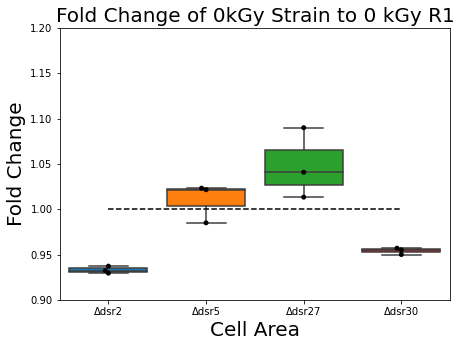

In [33]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_r1_0k_list, CA_03142024_dsr5_r1_0k_list, CA_03142024_dsr27_r1_0k_list, CA_03142024_dsr30_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr2_r1_0k_list, CA_03142024_dsr5_r1_0k_list, CA_03142024_dsr27_r1_0k_list, CA_03142024_dsr30_r1_0k_list], color="black")

plt.title("Fold Change of 0kGy Strain to 0 kGy R1")
plt.xlabel("Cell Area")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.9,1.2])

(0.7, 1.1)

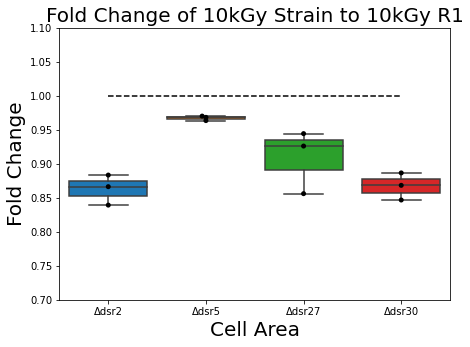

In [37]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_r1_10k_list, CA_03142024_dsr5_r1_10k_list, CA_03142024_dsr27_r1_10k_list, CA_03142024_dsr30_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr2_r1_10k_list, CA_03142024_dsr5_r1_10k_list, CA_03142024_dsr27_r1_10k_list, CA_03142024_dsr30_r1_10k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 10kGy R1")
plt.xlabel("Cell Area")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.7,1.1])

(0.9, 1.3)

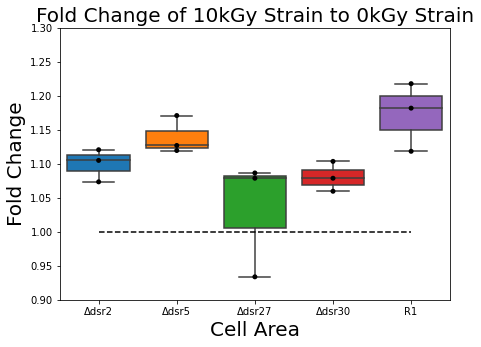

In [59]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_03142024_dsr2_10k_0k_list, CA_03142024_dsr5_10k_0k_list, CA_03142024_dsr27_10k_0k_list, CA_03142024_dsr30_10k_0k_list, CA_03142024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_03142024_dsr2_10k_0k_list, CA_03142024_dsr5_10k_0k_list, CA_03142024_dsr27_10k_0k_list, CA_03142024_dsr30_10k_0k_list, CA_03142024_r1_10k_0k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 0kGy Strain")
plt.xlabel("Cell Area")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30", "R1"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.9,1.3])

(0.6, 1.1)

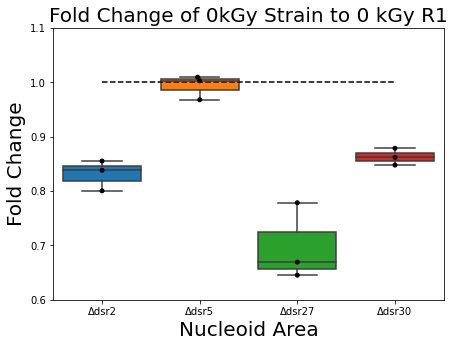

In [62]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_03142024_dsr2_r1_0k_list, NA_03142024_dsr5_r1_0k_list, NA_03142024_dsr27_r1_0k_list, NA_03142024_dsr30_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_03142024_dsr2_r1_0k_list, NA_03142024_dsr5_r1_0k_list, NA_03142024_dsr27_r1_0k_list, NA_03142024_dsr30_r1_0k_list], color="black")

plt.title("Fold Change of 0kGy Strain to 0 kGy R1")
plt.xlabel("Nucleoid Area")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.6,1.1])

(0.6, 1.1)

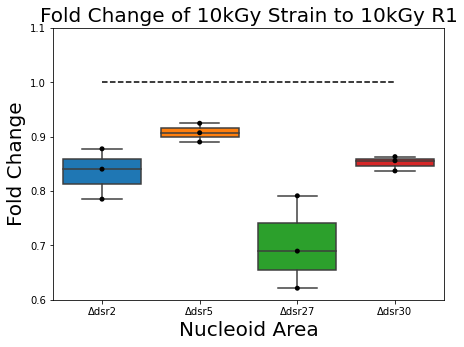

In [63]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_03142024_dsr2_r1_10k_list, NA_03142024_dsr5_r1_10k_list, NA_03142024_dsr27_r1_10k_list, NA_03142024_dsr30_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_03142024_dsr2_r1_10k_list, NA_03142024_dsr5_r1_10k_list, NA_03142024_dsr27_r1_10k_list, NA_03142024_dsr30_r1_10k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 10kGy R1")
plt.xlabel("Nucleoid Area")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.6,1.1])

(0.7, 1.2)

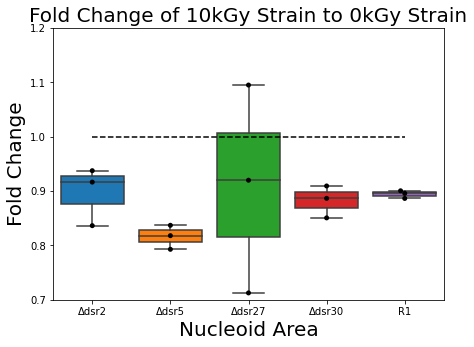

In [66]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_03142024_dsr2_10k_0k_list, NA_03142024_dsr5_10k_0k_list, NA_03142024_dsr27_10k_0k_list, NA_03142024_dsr30_10k_0k_list, NA_03142024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_03142024_dsr2_10k_0k_list, NA_03142024_dsr5_10k_0k_list, NA_03142024_dsr27_10k_0k_list, NA_03142024_dsr30_10k_0k_list, NA_03142024_r1_10k_0k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 0kGy Strain")
plt.xlabel("Nucleoid Area")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30", "R1"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.7,1.2])

(0.55, 1.1)

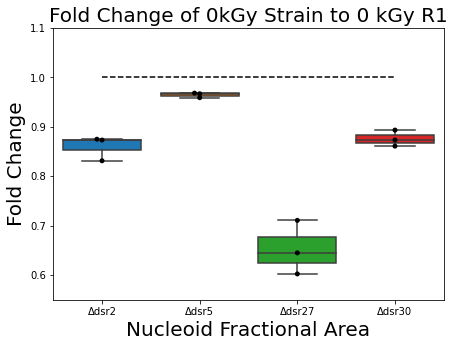

In [69]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_03142024_dsr2_r1_0k_list, NFA_03142024_dsr5_r1_0k_list, NFA_03142024_dsr27_r1_0k_list, NFA_03142024_dsr30_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_03142024_dsr2_r1_0k_list, NFA_03142024_dsr5_r1_0k_list, NFA_03142024_dsr27_r1_0k_list, NFA_03142024_dsr30_r1_0k_list], color="black")

plt.title("Fold Change of 0kGy Strain to 0 kGy R1")
plt.xlabel("Nucleoid Fractional Area")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.55,1.1])

(0.7, 1.1)

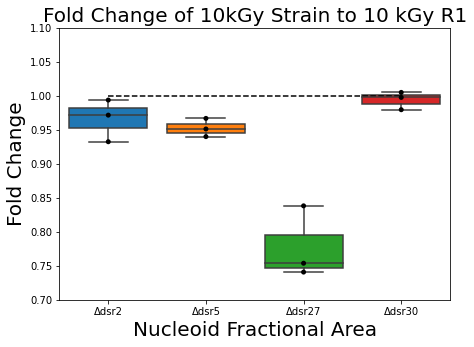

In [71]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_03142024_dsr2_r1_10k_list, NFA_03142024_dsr5_r1_10k_list, NFA_03142024_dsr27_r1_10k_list, NFA_03142024_dsr30_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_03142024_dsr2_r1_10k_list, NFA_03142024_dsr5_r1_10k_list, NFA_03142024_dsr27_r1_10k_list, NFA_03142024_dsr30_r1_10k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 10 kGy R1")
plt.xlabel("Nucleoid Fractional Area")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.7,1.1])

(0.65, 1.1)

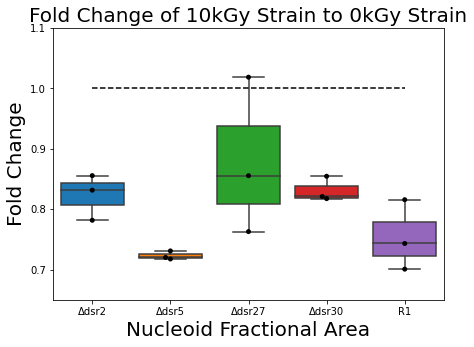

In [73]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_03142024_dsr2_10k_0k_list, NFA_03142024_dsr5_10k_0k_list, NFA_03142024_dsr27_10k_0k_list, NFA_03142024_dsr30_10k_0k_list, NFA_03142024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_03142024_dsr2_10k_0k_list, NFA_03142024_dsr5_10k_0k_list, NFA_03142024_dsr27_10k_0k_list, NFA_03142024_dsr30_10k_0k_list, NFA_03142024_r1_10k_0k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 0kGy Strain")
plt.xlabel("Nucleoid Fractional Area")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30", "R1"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.65,1.1])

(0.95, 1.2)

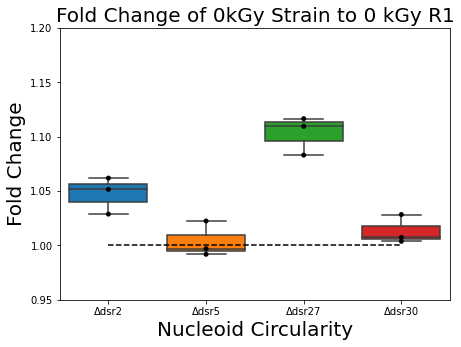

In [75]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_03142024_dsr2_r1_0k_list, circ_03142024_dsr5_r1_0k_list, circ_03142024_dsr27_r1_0k_list, circ_03142024_dsr30_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_03142024_dsr2_r1_0k_list, circ_03142024_dsr5_r1_0k_list, circ_03142024_dsr27_r1_0k_list, circ_03142024_dsr30_r1_0k_list], color="black")

plt.title("Fold Change of 0kGy Strain to 0 kGy R1")
plt.xlabel("Nucleoid Circularity")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.95,1.2])

(0.95, 1.1)

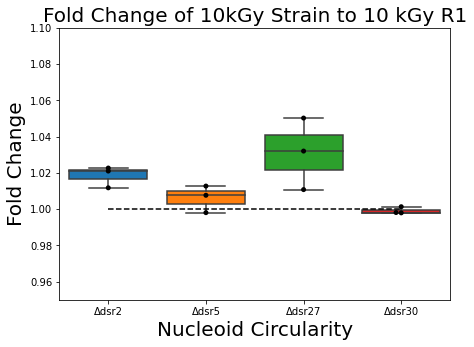

In [77]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_03142024_dsr2_r1_10k_list, circ_03142024_dsr5_r1_10k_list, circ_03142024_dsr27_r1_10k_list, circ_03142024_dsr30_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_03142024_dsr2_r1_10k_list, circ_03142024_dsr5_r1_10k_list, circ_03142024_dsr27_r1_10k_list, circ_03142024_dsr30_r1_10k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 10 kGy R1")
plt.xlabel("Nucleoid Circularity")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.95,1.1])

(0.95, 1.2)

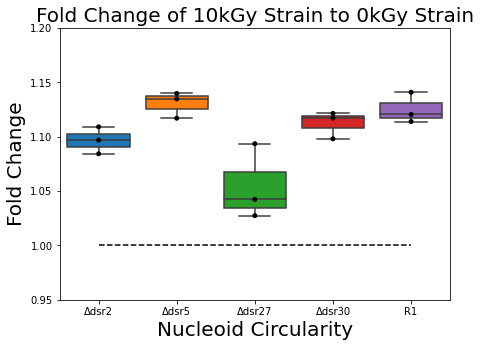

In [79]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_03142024_dsr2_10k_0k_list, circ_03142024_dsr5_10k_0k_list, circ_03142024_dsr27_10k_0k_list, circ_03142024_dsr30_10k_0k_list, circ_03142024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_03142024_dsr2_10k_0k_list, circ_03142024_dsr5_10k_0k_list, circ_03142024_dsr27_10k_0k_list, circ_03142024_dsr30_10k_0k_list, circ_03142024_r1_10k_0k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 0kGy Strain")
plt.xlabel("Nucleoid Circularity")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30", "R1"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.95,1.2])

(0.7, 1.05)

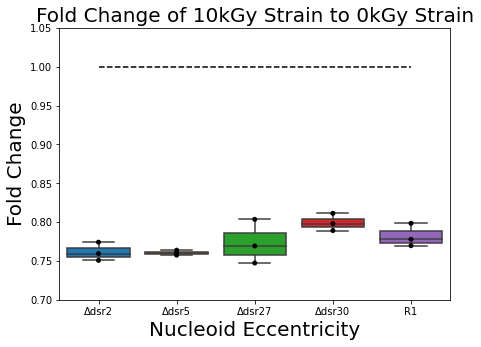

In [84]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_03142024_dsr2_10k_0k_list, eccen_03142024_dsr5_10k_0k_list, eccen_03142024_dsr27_10k_0k_list, eccen_03142024_dsr30_10k_0k_list, eccen_03142024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_03142024_dsr2_10k_0k_list, eccen_03142024_dsr5_10k_0k_list, eccen_03142024_dsr27_10k_0k_list, eccen_03142024_dsr30_10k_0k_list, eccen_03142024_r1_10k_0k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 0kGy Strain")
plt.xlabel("Nucleoid Eccentricity")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30", "R1"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.7,1.05])

(0.85, 1.05)

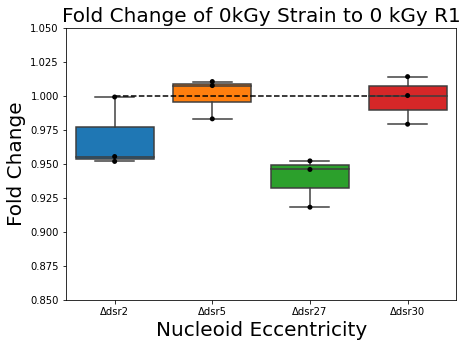

In [87]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_03142024_dsr2_r1_0k_list, eccen_03142024_dsr5_r1_0k_list, eccen_03142024_dsr27_r1_0k_list, eccen_03142024_dsr30_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_03142024_dsr2_r1_0k_list, eccen_03142024_dsr5_r1_0k_list, eccen_03142024_dsr27_r1_0k_list, eccen_03142024_dsr30_r1_0k_list], color="black")

plt.title("Fold Change of 0kGy Strain to 0 kGy R1")
plt.xlabel("Nucleoid Eccentricity")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.85,1.05])

(0.85, 1.05)

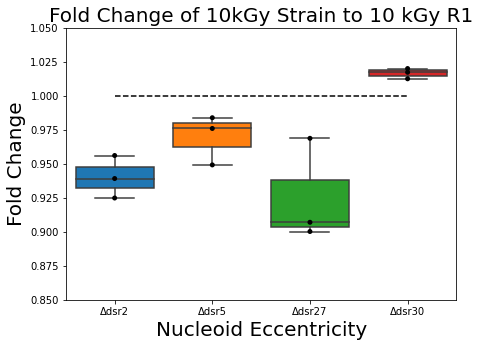

In [88]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_03142024_dsr2_r1_10k_list, eccen_03142024_dsr5_r1_10k_list, eccen_03142024_dsr27_r1_10k_list, eccen_03142024_dsr30_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_03142024_dsr2_r1_10k_list, eccen_03142024_dsr5_r1_10k_list, eccen_03142024_dsr27_r1_10k_list, eccen_03142024_dsr30_r1_10k_list], color="black")

plt.title("Fold Change of 10kGy Strain to 10 kGy R1")
plt.xlabel("Nucleoid Eccentricity")
ax.set_xticklabels(["\u0394dsr2", "\u0394dsr5", "\u0394dsr27","\u0394dsr30"])
plt.ylabel("Fold Change")
plt.plot([1,1,1,1], "--", color = "black")
plt.ylim([0.85,1.05])